# Developing an AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load and preprocess the image dataset
* Train the image classifier on your dataset
* Use the trained classifier to predict image content

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

First up is importing the packages you'll need. It's good practice to keep all the imports at the beginning of your code. As you work through this notebook and find you need to import a package, make sure to add the import up here.

In [1]:
%matplotlib inline

In [2]:
# Imports

try:
    import json
    import torch
    import numpy as np
    import torch.nn.functional as F
    import matplotlib.pyplot as plt
    from torch import nn
    from torch import optim
    from torchvision import datasets, transforms, models
    from PIL import Image
    print("\nImports: Executed Successfully\n")
except:
    print("\nImports: Failed\n")


Imports: Executed Successfully



## Load the data

Here you'll use `torchvision` to load the data ([documentation](http://pytorch.org/docs/0.3.0/torchvision/index.html)). The data should be included alongside this notebook, otherwise you can [download it here](https://s3.amazonaws.com/content.udacity-data.com/nd089/flower_data.tar.gz). The dataset is split into three parts, training, validation, and testing. For the training, you'll want to apply transformations such as random scaling, cropping, and flipping. This will help the network generalize leading to better performance. You'll also need to make sure the input data is resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet. For this you don't want any scaling or rotation transformations, but you'll need to resize then crop the images to the appropriate size.

The pre-trained networks you'll use were trained on the ImageNet dataset where each color channel was normalized separately. For all three sets you'll need to normalize the means and standard deviations of the images to what the network expects. For the means, it's `[0.485, 0.456, 0.406]` and for the standard deviations `[0.229, 0.224, 0.225]`, calculated from the ImageNet images.  These values will shift each color channel to be centered at 0 and range from -1 to 1.
 

In [3]:
# Directories

try:
    data_dir = 'flowers'
    train_dir = data_dir + '/train'
    valid_dir = data_dir + '/valid'
    test_dir = data_dir + '/test'
    print("\nDirectories: Executed Successfully\n")
except:
    print("\nDirectories: Failed\n")


Directories: Executed Successfully



In [4]:
# Transforms

try:
    # Transforms for training dataset.
    training_transforms = transforms.Compose([transforms.RandomRotation(45), transforms.RandomResizedCrop(224), transforms.RandomHorizontalFlip(), transforms.ToTensor(), transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    # Transforms for validation and testing dataset.
    validation_testing_transforms = transforms.Compose([transforms.Resize(250), transforms.CenterCrop(224), transforms.ToTensor(), transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    print("\nTransforms: Executed Successfully\n")
except:
    print("\nTransforms: Failed\n")

# Datasets

try:
    # Dataset for training
    dataset_for_training = datasets.ImageFolder(train_dir, transform=training_transforms)
    # Dataset of validation
    dataset_for_validation = datasets.ImageFolder(valid_dir, transform=validation_testing_transforms)
    # Dataset of testing
    dataset_for_testing = datasets.ImageFolder(test_dir, transform=validation_testing_transforms)
    print("\nDatasets: Executed Successfully\n")
except:
    print("\nDatasets: Failed\n")

# Dataloaders

try:
    # Training Dataloader
    load_train = torch.utils.data.DataLoader(dataset_for_training, batch_size=64, shuffle=True)
    # Validation Dataloader
    load_valid = torch.utils.data.DataLoader(dataset_for_validation, batch_size=64)
    # Testing Dataloader
    load_test = torch.utils.data.DataLoader(dataset_for_testing, batch_size=64)
    print("\nDataloaders: Executed Successfully\n")
except:
    print("\nDataloaders: Failed\n")


Transforms: Executed Successfully


Datasets: Executed Successfully


Dataloaders: Executed Successfully



### Label mapping

You'll also need to load in a mapping from category label to category name. You can find this in the file `cat_to_name.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/2/library/json.html). This will give you a dictionary mapping the integer encoded categories to the actual names of the flowers.

In [5]:
# Label Mapping

try:
    with open('cat_to_name.json', 'r') as f:
        cat_to_name = json.load(f)
    print("\nLabel Mapping: Executed Successfully\n")
except:
    print("\nLabel Mapping: Failed\n")


Label Mapping: Executed Successfully



# Building and training the classifier

Now that the data is ready, it's time to build and train the classifier. As usual, you should use one of the pretrained models from `torchvision.models` to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. Refer to [the rubric](https://review.udacity.com/#!/rubrics/1663/view) for guidance on successfully completing this section. Things you'll need to do:

* Load a [pre-trained network](http://pytorch.org/docs/master/torchvision/models.html) (If you need a starting point, the VGG networks work great and are straightforward to use)
* Define a new, untrained feed-forward network as a classifier, using ReLU activations and dropout
* Train the classifier layers using backpropagation using the pre-trained network to get the features
* Track the loss and accuracy on the validation set to determine the best hyperparameters

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right. Make sure to try different hyperparameters (learning rate, units in the classifier, epochs, etc) to find the best model. Save those hyperparameters to use as default values in the next part of the project.

One last important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to
GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module.

<font color='red'>**Note for Workspace users:** If your network is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. Typically this happens with wide dense layers after the convolutional layers. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.</font>

In [6]:
# Loading AlexNet (a pre-trained network).

try:
    my_model = models.alexnet(pretrained=True)
    my_model
    print("\nLoading AlexNet: Executed Successfully\n")
    print(my_model)
except:
    print("\nLoading AlexNet: Failed\n")


Loading AlexNet: Executed Successfully

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    

In [7]:
# Freezing model parameters

try:
    for param in my_model.parameters():
        param.requires_grad = False
    print("\nFreeze Model Parameters: Executed Successfully\n")
except:
    print("\nFreeze Model Parameters: Failed\n")


Freeze Model Parameters: Executed Successfully



In [8]:
# Classifier Builder Function

def classifier_builder(a, b, c, d, dropout):
    
    # Classifier Values
    fc1_input = a
    fc1_output = fc2_input = b
    fc2_output = fc3_input = c
    fc3_output = d
    dropout_value = dropout
    
    # Classifier Structure
    my_classifier = nn.Sequential(nn.Linear(fc1_input, fc1_output), nn.ReLU(), nn.Dropout(dropout_value), nn.Linear(fc2_input, fc2_output), nn.ReLU(), nn.Dropout(dropout_value), nn.Linear(fc3_input, fc3_output), nn.LogSoftmax(dim=1))
    
    # Return Classifier
    return my_classifier

In [9]:
# Building Classifier

try:
    my_model.classifier = classifier_builder(a=9216, b=4096, c=2048, d=102, dropout=0.2)
    print("\nBuilding Classifier: Executed Successfully\n")
    print(my_model.classifier)
except:
    print("\nBuilding Classifier: Failed\n")


Building Classifier: Executed Successfully

Sequential(
  (0): Linear(in_features=9216, out_features=4096, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2)
  (3): Linear(in_features=4096, out_features=2048, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2)
  (6): Linear(in_features=2048, out_features=102, bias=True)
  (7): LogSoftmax()
)


In [10]:
# Script to enable GPU if available

try:
    if torch.cuda.is_available():
        my_device = torch.device('cuda:0')
        print('Status: GPU is ready')
    else:
        my_device = torch.device('cpu')
        print("\nStatus: GPU not available\n")
    print("\nDevice Script: Executed Successfully\n")
except:
    print("\nDevice Script: Failed\n")

Status: GPU is ready

Device Script: Executed Successfully



In [11]:
# Model Training and Validation Engine

def model_engine(epochs, validate_every, my_criterion, opt_function, lr):
    
    # Training Mode
    my_model.train()
    
    # Setting Optimizer and Learning Rate
    my_optimizer = opt_function(my_model.classifier.parameters(), lr=lr)
    
    # Moving model tensors to GPU/CPU
    my_model.to(my_device)
    
    # Tracking Loop Steps
    loop_steps = 0
    
    # Tracking Running Loss
    running_loss = 0
    
    # Model Training Loop
    for e in range(epochs):
        # Getting Inputs and Labels from Training Dataloader
        for training_inputs, training_labels in load_train:
            # Incrementing Loop Step
            loop_steps += 1
            # Moving input and label tensors to GPU/CPU
            training_inputs, training_labels = training_inputs.to(my_device), training_labels.to(my_device)
            # Setting gradients to zero 
            my_optimizer.zero_grad()
            # Forward Pass and Getting Log Probabilities
            training_logps = my_model.forward(training_inputs)
            # Calculate Loss
            training_loss = my_criterion(training_logps, training_labels)
            # Backward Pass
            training_loss.backward()
            # Upading Weights
            my_optimizer.step()
            # Adding Training Loss to Running Loss
            running_loss += training_loss.item()

            # Checking Validation Criteria
            if loop_steps % validate_every == 0:
                # Evaluation Mode
                my_model.eval()
                # Tracking Validation Loss
                validation_loss = 0
                # Tracking Validation Accuracy
                validation_accuracy = 0
                # Disabling Gradient Calculation
                with torch.no_grad():

                    # Validation Process

                    # Getting Inputs and Labels from Validation Dataloader
                    for validation_inputs, validation_labels in load_valid:
                        # Moving input and label tensors to GPU/CPU
                        validation_inputs, validation_labels = validation_inputs.to(my_device), validation_labels.to(my_device)
                        # Forward Pass and Getting Log Probabilities
                        validation_logps = my_model.forward(validation_inputs)
                        # Calculate Loss
                        current_validation_loss = my_criterion(validation_logps, validation_labels)
                        # Adding Current Loss to Validation Loss
                        validation_loss += current_validation_loss.item()

                        # Calculating Accuracy

                        # Getting Class Probabilities
                        val_ps = torch.exp(validation_logps)
                        # Getting top-K value and index
                        val_top_p, val_top_class = val_ps.topk(1, dim=1)
                        # Checking label matches
                        val_equals = val_top_class == validation_labels.view(*val_top_class.shape)
                        # Taking mean of label matches to calculate accuracy
                        validation_accuracy += torch.mean(val_equals.type(torch.FloatTensor)).item()
                
                # Printing Metrics
                metric_epoch = e+1
                metric_trainloss = running_loss/validate_every
                metric_valloss = validation_loss/len(load_valid)
                metric_valaccuracy = validation_accuracy/len(load_valid)*100
                print(f"Epoch # {metric_epoch}/{epochs} | Training Loss {metric_trainloss:.2f} | Validation Loss {metric_valloss:.2f} | Validation Accuracy {metric_valaccuracy:.2f} %")
                
                # Reset Running Loss
                running_loss = 0

In [18]:
# Begin Model Training and Validation

try:
    engine = model_engine(epochs=1, validate_every=20, my_criterion=nn.NLLLoss(), opt_function=optim.Adam, lr=0.001)
    engine
    print("\nModel Training and Validation: Executed Successfully\n")
except:
    print("\nModel Training and Validation: Failed\n")

Epoch # 1/1 | Training Loss 1.22 | Validation Loss 0.68 | Validation Accuracy 82.98 %
Epoch # 1/1 | Training Loss 0.82 | Validation Loss 0.66 | Validation Accuracy 84.30 %
Epoch # 1/1 | Training Loss 0.86 | Validation Loss 0.67 | Validation Accuracy 85.36 %
Epoch # 1/1 | Training Loss 0.80 | Validation Loss 0.62 | Validation Accuracy 83.82 %
Epoch # 1/1 | Training Loss 0.81 | Validation Loss 0.75 | Validation Accuracy 84.14 %

Model Training and Validation: Executed Successfully



## Testing your network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. Run the test images through the network and measure the accuracy, the same way you did validation. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [19]:
# Begin Model Testing

try:
    # Moving model tensors to GPU/CPU
    my_model.to(my_device)
    # Evaluation Mode
    my_model.eval()
    # Tracking Testing Accuracy
    test_accuracy = 0
    # Disabling Gradient Calculation
    with torch.no_grad():

        # Testing Process

        # Getting Inputs and Labels from Testing Dataloader
        for test_inputs, test_labels in load_test:
            # Moving input and label tensors to GPU/CPU
            test_inputs, test_labels = test_inputs.to(my_device), test_labels.to(my_device)
            # Forward Pass and Getting Log Probabilities
            test_logps = my_model.forward(test_inputs)

            # Calculating Accuracy

            # Getting Class Probabilities
            test_ps = torch.exp(test_logps)
            # Getting top-K value and index
            test_top_p, test_top_class = test_ps.topk(1, dim=1)
            # Checking label matches
            test_equals = test_top_class == test_labels.view(*test_top_class.shape)
            # Taking mean of label matches to calculate accuracy
            test_accuracy += torch.mean(test_equals.type(torch.FloatTensor)).item()

    # Printing Metrics
    metric_testaccuracy = test_accuracy/len(load_valid)*100
    print(f"Model Accuracy on Testing Dataset is {metric_testaccuracy:.2f} %")
    print("\nModel Testing: Executed Successfully\n")
except:
    print("\nModel Testing: Failed\n")

Model Accuracy on Testing Dataset is 83.25 %

Model Testing: Executed Successfully



## Save the checkpoint

Now that your network is trained, save the model so you can load it later for making predictions. You probably want to save other things such as the mapping of classes to indices which you get from one of the image datasets: `image_datasets['train'].class_to_idx`. You can attach this to the model as an attribute which makes inference easier later on.

```model.class_to_idx = image_datasets['train'].class_to_idx```

Remember that you'll want to completely rebuild the model later so you can use it for inference. Make sure to include any information you need in the checkpoint. If you want to load the model and keep training, you'll want to save the number of epochs as well as the optimizer state, `optimizer.state_dict`. You'll likely want to use this trained model in the next part of the project, so best to save it now.

In [20]:
# Model to Checkpoint Function

def model_to_checkpoint(model):
    # Adding details to config dictionary
    config = {'classifier':my_model.classifier, 
              'state_dict':model.state_dict(),
              'class_to_idx':dataset_for_training.class_to_idx, 
              'pre_trained':'alexnet', 
              'freeze_param':1}
    # Creating checkpoint.pth file
    torch.save(config, 'checkpoint.pth')

In [21]:
# Create Model Checkpoint

try:
    model_to_checkpoint(my_model)
    print("\nCreate Model Checkpoint: Executed Successfully\n")
except:
    print("\nCreate Model Checkpoint: Failed\n")


Create Model Checkpoint: Executed Successfully



## Loading the checkpoint

At this point it's good to write a function that can load a checkpoint and rebuild the model. That way you can come back to this project and keep working on it without having to retrain the network.

In [22]:
# Checkpoint to Model Function

def checkpoint_to_model(checkpoint):
    # Loading data to dictionary
    config = torch.load(checkpoint)
    if config['pre_trained'] == 'alexnet':
        # Uploading data to new model
        restore_model = models.alexnet(pretrained=True)
        restore_model.classifier = config['classifier']
        restore_model.load_state_dict(config['state_dict'])
        restore_model.class_to_idx = config['class_to_idx']
        if config['freeze_param'] == 1:
            for param in restore_model.parameters():
                param.requires_grad = False
        # Return restored model
        return restore_model
    # Else return none
    return None

In [23]:
# Restore Model

try:
    restored_model = checkpoint_to_model('checkpoint.pth')
    my_model = restored_model
    print("\nRestore Model: Executed Successfully\n")
except:
    print("\nRestore Model: Failed\n")


Restore Model: Executed Successfully



In [24]:
# Testing Restored Model

try:
    print("\n")
    print(my_model.classifier)
    print("\n")
    print(my_model.class_to_idx)
    print("\n")
    print(my_model.state_dict().keys())
    print("\nTesting Restored Model: Executed Successfully\n")
except:
    print("\nTesting Restored Model: Failed\n")



Sequential(
  (0): Linear(in_features=9216, out_features=4096, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2)
  (3): Linear(in_features=4096, out_features=2048, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.2)
  (6): Linear(in_features=2048, out_features=102, bias=True)
  (7): LogSoftmax()
)


{'1': 0, '10': 1, '100': 2, '101': 3, '102': 4, '11': 5, '12': 6, '13': 7, '14': 8, '15': 9, '16': 10, '17': 11, '18': 12, '19': 13, '2': 14, '20': 15, '21': 16, '22': 17, '23': 18, '24': 19, '25': 20, '26': 21, '27': 22, '28': 23, '29': 24, '3': 25, '30': 26, '31': 27, '32': 28, '33': 29, '34': 30, '35': 31, '36': 32, '37': 33, '38': 34, '39': 35, '4': 36, '40': 37, '41': 38, '42': 39, '43': 40, '44': 41, '45': 42, '46': 43, '47': 44, '48': 45, '49': 46, '5': 47, '50': 48, '51': 49, '52': 50, '53': 51, '54': 52, '55': 53, '56': 54, '57': 55, '58': 56, '59': 57, '6': 58, '60': 59, '61': 60, '62': 61, '63': 62, '64': 63, '65': 64, '66': 65, '67': 66, '68': 67, '69': 68, '7': 69, '70': 70, '71': 71

# Inference for classification

Now you'll write a function to use a trained network for inference. That is, you'll pass an image into the network and predict the class of the flower in the image. Write a function called `predict` that takes an image and a model, then returns the top $K$ most likely classes along with the probabilities. It should look like 

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

First you'll need to handle processing the input image such that it can be used in your network. 

## Image Preprocessing

You'll want to use `PIL` to load the image ([documentation](https://pillow.readthedocs.io/en/latest/reference/Image.html)). It's best to write a function that preprocesses the image so it can be used as input for the model. This function should process the images in the same manner used for training. 

First, resize the images where the shortest side is 256 pixels, keeping the aspect ratio. This can be done with the [`thumbnail`](http://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.thumbnail) or [`resize`](http://pillow.readthedocs.io/en/3.1.x/reference/Image.html#PIL.Image.Image.thumbnail) methods. Then you'll need to crop out the center 224x224 portion of the image.

Color channels of images are typically encoded as integers 0-255, but the model expected floats 0-1. You'll need to convert the values. It's easiest with a Numpy array, which you can get from a PIL image like so `np_image = np.array(pil_image)`.

As before, the network expects the images to be normalized in a specific way. For the means, it's `[0.485, 0.456, 0.406]` and for the standard deviations `[0.229, 0.224, 0.225]`. You'll want to subtract the means from each color channel, then divide by the standard deviation. 

And finally, PyTorch expects the color channel to be the first dimension but it's the third dimension in the PIL image and Numpy array. You can reorder dimensions using [`ndarray.transpose`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.transpose.html). The color channel needs to be first and retain the order of the other two dimensions.

In [25]:
# Image Preprocessing Function

def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    # Open image with Pillow
    with Image.open(image) as my_image:
        
        
        # Resize based on shorter side
        if my_image.size[0] < my_image.size[1]:
            my_image.thumbnail((256, 1024))
        else:
            my_image.thumbnail((1024, 256))
            
            
        # Image Dimensions
        my_image_width, my_image_height = my_image.size
        # New Coordinates
        x1 = (my_image_width-224)/2
        y1 = (my_image_height-224)/2
        x2 = (my_image_width+224)/2
        y2 = (my_image_height+224)/2
        # Pillow Crop Function
        my_image = my_image.crop((x1, y1, x2, y2))
        
        
        # Image to NP Array
        my_np_image = np.array(my_image)
        # Convert to float values between 0 and 1
        my_np_image = my_np_image/255
        # Given Mean and Standard Deviation
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        # Normalize Step
        my_np_image = (my_np_image - mean) / std
        
        
        # Reorder Dimensions
        my_np_image = my_np_image.transpose((2, 0, 1))
        
        
        # Return Processed Image
        return my_np_image

To check your work, the function below converts a PyTorch tensor and displays it in the notebook. If your `process_image` function works, running the output through this function should return the original image (except for the cropped out portions).

In [26]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax


Image Preprocessing: Executed Successfully



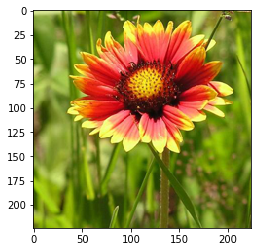

In [27]:
# Image Preprocessing
try:
    imshow(process_image('flowers/test/100/image_07926.jpg'))
    print("\nImage Preprocessing: Executed Successfully\n")
except:
    print("\nImage Preprocessing: Failed\n")

## Class Prediction

Once you can get images in the correct format, it's time to write a function for making predictions with your model. A common practice is to predict the top 5 or so (usually called top-$K$) most probable classes. You'll want to calculate the class probabilities then find the $K$ largest values.

To get the top $K$ largest values in a tensor use [`x.topk(k)`](http://pytorch.org/docs/master/torch.html#torch.topk). This method returns both the highest `k` probabilities and the indices of those probabilities corresponding to the classes. You need to convert from these indices to the actual class labels using `class_to_idx` which hopefully you added to the model or from an `ImageFolder` you used to load the data ([see here](#Save-the-checkpoint)). Make sure to invert the dictionary so you get a mapping from index to class as well.

Again, this method should take a path to an image and a model checkpoint, then return the probabilities and classes.

```python
probs, classes = predict(image_path, model)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

In [28]:
# Predict Class Function

def predict(image_path, model_checkpoint, topk=5):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    # Image Preprocessing
    prediction_image = process_image(image_path)
    # Numpy to Torch
    prediction_image = torch.from_numpy(prediction_image)
    # Tensor to GPU/CPU
    prediction_image = prediction_image.to(my_device)
    # Change tensor dimension
    prediction_image = torch.unsqueeze(prediction_image, 0)
    # Double tensor to float
    prediction_image = prediction_image.float()
    
    # Checkpoint to Model Function to create new model
    model = checkpoint_to_model(model_checkpoint)

    # Moving model tensors to GPU/CPU
    model.to(my_device)
    # Evaluation Mode
    model.eval()
    # Disabling Gradient Calculation
    with torch.no_grad():
        # Forward Pass and Getting Log Probabilities
        prediction_logps = model.forward(prediction_image)
        # Getting Class Probabilities
        prediction_ps = torch.exp(prediction_logps)
        # Getting top-K value and index
        prediction_top_p, prediction_top_class = prediction_ps.topk(topk)
        # Creating Probs list
        probs = prediction_top_p.cpu().numpy()[0]

        # Creating Classes list
        classes = []
        # Creating Index to Classes
        idx_to_class = dict(zip(model.class_to_idx.values(), model.class_to_idx.keys()))
        # Appending class elements to Classes list
        for element in prediction_top_class.cpu().numpy()[0]:
            classes.append(idx_to_class[element])
        # Return probabilities and classes
        return probs, classes

In [29]:
# Testing Predict Function

try:
    image_probs, image_classes = predict('flowers/test/11/image_03130.jpg', 'checkpoint.pth')
    print("\nProbabilities:\n")
    print(image_probs)
    print("\nClasses:\n")
    print(image_classes)
    print("\nTesting Predict Function: Executed Successfully\n")
except:
    print("\nTesting Predict Function: Failed\n")


Probabilities:

[ 0.68602967  0.18580575  0.08053549  0.01131129  0.00706247]

Classes:

['4', '11', '72', '74', '43']

Testing Predict Function: Executed Successfully



## Sanity Checking

Now that you can use a trained model for predictions, check to make sure it makes sense. Even if the testing accuracy is high, it's always good to check that there aren't obvious bugs. Use `matplotlib` to plot the probabilities for the top 5 classes as a bar graph, along with the input image. It should look like this:

<img src='assets/inference_example.png' width=300px>

You can convert from the class integer encoding to actual flower names with the `cat_to_name.json` file (should have been loaded earlier in the notebook). To show a PyTorch tensor as an image, use the `imshow` function defined above.

In [30]:
# Sanity Check Function

def sanity_check(model_checkpoint, imagepath, category):
    
    # Setting plot size
    plt.figure(figsize=(5, 10))
        
    # process image
    processed_image = process_image(imagepath)
    # imshow with subplot = 1 
    imshow(processed_image, ax=plt.subplot(2,1,1))
    # image title
    plt.title(cat_to_name[str(category)])
        
    # getting probabilities and classes
    sanity_probs, sanity_classes = predict(imagepath, model_checkpoint)
    # empty list for names
    sanity_names = []
    # extracting names for classes
    for sanity_class in sanity_classes:
        sanity_names.append(cat_to_name[sanity_class])
    # probabilities with subplot = 2
    plt.subplot(2,1,2)
    # creating plot 
    plt.barh(sanity_names, sanity_probs)
    
    # Plotting
    plt.show()

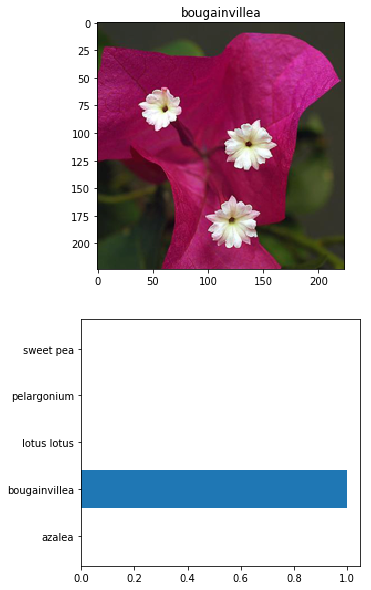


Sanity Check: Executed Successfully



In [31]:
# Perfoming Sanity Check

try:
    sanity_check('checkpoint.pth', 'flowers/test/95/image_07514.jpg', 95)
    print("\nSanity Check: Executed Successfully\n")
except:
    print("\nSanity Check: Failed\n")

<font color='red'>**Reminder for Workspace users:** If your network becomes very large when saved as a checkpoint, there might be issues with saving backups in your workspace. You should reduce the size of your hidden layers and train again. 
    
We strongly encourage you to delete these large interim files and directories before navigating to another page or closing the browser tab.</font>

In [32]:
# Remove .pth files

try:
    !rm checkpoint.pth
    print("\nRemove PTH File: Executed Successfully\n")
except:
    print("\nRemove PTH File: Failed\n")


Remove PTH File: Executed Successfully

